In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
dataset = fetch_california_housing()
x= dataset['data']
y= dataset['target']
feature_names = dataset['feature_names']
print(x.shape, y.shape)

(20640, 8) (20640,)


## Supervised feature selection method

### Filter Based methods

#### Mutual information

In [3]:
from sklearn.feature_selection import mutual_info_regression, SelectPercentile, SelectKBest

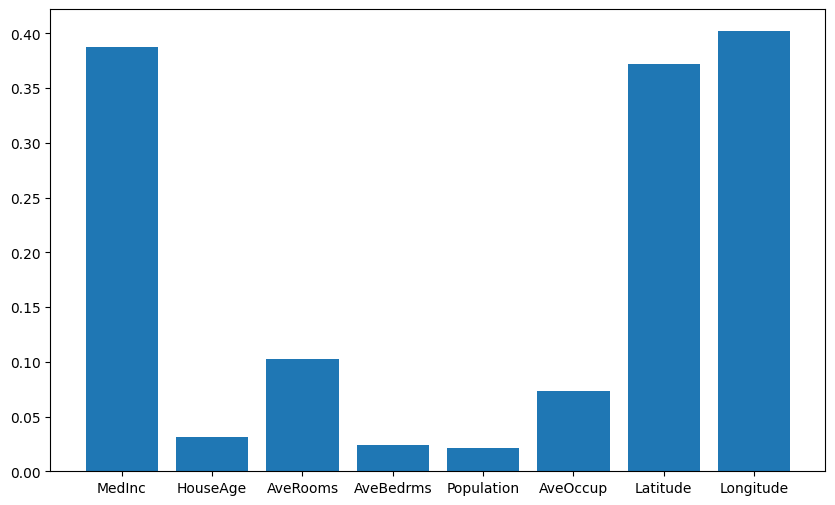

In [52]:
plt.figure(figsize=(10, 6))
plt.bar(feature_names, mutual_info_regression(x,y))
plt.show()

#### option-1 using selectpercentile

In [42]:
x_new = SelectPercentile(mutual_info_regression, percentile=50).fit_transform(x, y)
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('R_2 SCORE=',r2_score(y_test, y_pred))
print('MSE=',mean_squared_error(y_test, y_pred))

R_2 SCORE= 0.5633388886436645
MSE= 0.5794992539539958


#### option-2 using selectkbest

In [43]:
x_new = SelectKBest(mutual_info_regression, k=5).fit_transform(x, y)
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('R_2 SCORE=',r2_score(y_test, y_pred))
print('MSE=',mean_squared_error(y_test, y_pred))

R_2 SCORE= 0.5883367007178422
MSE= 0.5416144432533058


#### Pearson correlation

#### First way of using Pearson correlation ~ Analyze the relationship between 'each' individual feature input and output

In [44]:
from sklearn.feature_selection import f_regression, SelectKBest
x_new = SelectKBest(f_regression, k=5).fit_transform(x, y)
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('R_2 SCORE=',r2_score(y_test, y_pred))
print('MSE=',mean_squared_error(y_test, y_pred))

R_2 SCORE= 0.5233681260777028
MSE= 0.6533466344043528


#### Second way of using Pearson correlation ~ analyzing the features themselves while dropping the highly correlated ones dealing with input data alone

In [15]:
x_pd = pd.DataFrame(x, columns=feature_names)
x_pd.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


<Axes: >

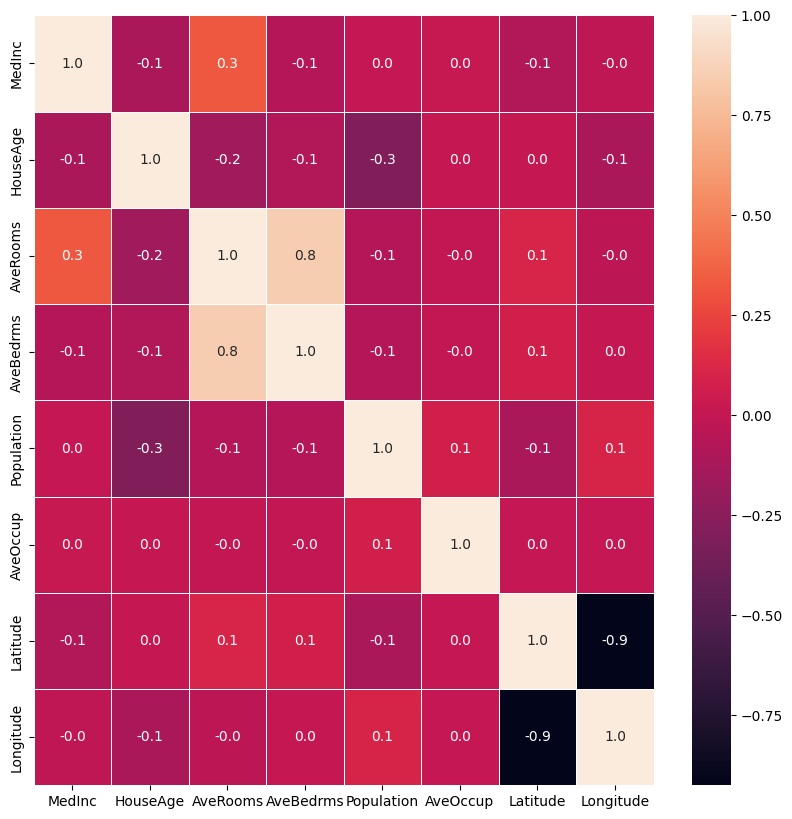

In [16]:
x_pd.corr()
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(x_pd.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [45]:
x_new = x_pd.drop(['Latitude', 'Longitude','AveRooms','AveBedrms'], axis=1)
x_new.head()
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('R_2 SCORE=',r2_score(y_test, y_pred))
print('MSE=',mean_squared_error(y_test, y_pred))

R_2 SCORE= 0.48302270588293106
MSE= 0.6873511405138623


### Wrapped based Methods

#### Recursive feature elimination [RFE]

In [19]:
from sklearn.feature_selection import RFE

In [46]:
estimator = Lasso()
selector = RFE(estimator, n_features_to_select=5, step=1).fit(x, y)
X_new = selector.transform(x)
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('R_2 SCORE=',r2_score(y_test, y_pred))
print('MSE=',mean_squared_error(y_test, y_pred))


R_2 SCORE= 0.5936653042684905
MSE= 0.5349003580658345


#### Sequential feature selection

In [47]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import RidgeCV
ridge = RidgeCV().fit(x, y)
sfs_forward = SequentialFeatureSelector(
    ridge, n_features_to_select="auto", direction="forward"
).fit(x, y)
X_new = sfs_forward.transform(x)
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('R_2 SCORE=',r2_score(y_test, y_pred))
print('MSE=',mean_squared_error(y_test, y_pred))

R_2 SCORE= 0.5136795611549183
MSE= 0.6446855765381797


### Embeded methods

#### Lasso

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)
w = []
r2 = []
mse = []
alpha_list = [0,0.1,0.5,2]

for alpha in alpha_list:
  model = Lasso(alpha=alpha)
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  r2.append(r2_score(y_test,y_pred))
  mse.append(mean_squared_error(y_test,y_pred))
  w.append(model.coef_.tolist())

print(r2,mse)

<ipython-input-39-0dc0963ed88e>:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(x_train,y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


[0.6221528083065293, 0.5660650480312001, 0.46625624392019294, 9.684551236954775e-06] [0.5309137085583419, 0.6097227124814505, 0.7499642267821205, 1.4050880317989227]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.323e+03, tolerance: 2.168e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


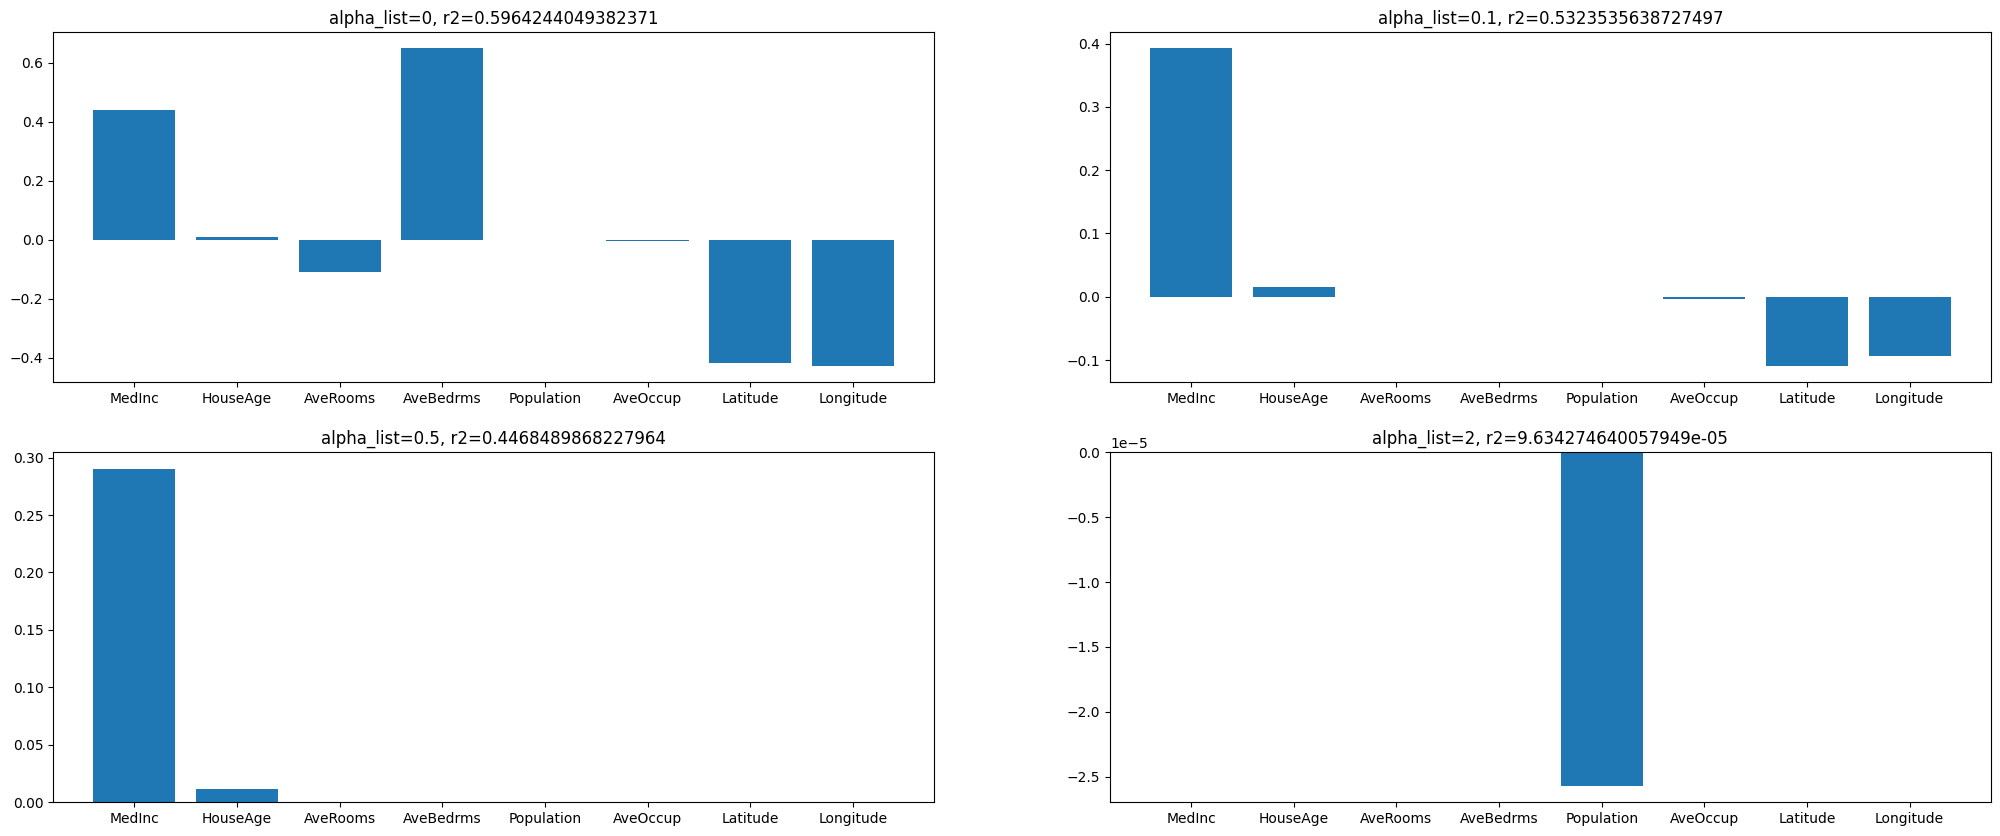

In [31]:
plt.figure(figsize=(25,10))

for i in range(len(alpha_list)):
  plt.subplot(2,2,i+1)
  plt.bar(feature_names,w[i])
  plt.title('alpha_list={}, r2={}'.format(alpha_list[i],r2[i]))

plt.show()

## unsupervised feature selection method

### Principal component analysis [Dimentionality reduction technique that transforms the features into a new space selected on the basis of variance]

In [41]:
from sklearn.decomposition import PCA
X_new = PCA(n_components=6, svd_solver='full').fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('R_2 SCORE=',r2_score(y_test, y_pred))
print('MSE=',mean_squared_error(y_test, y_pred))

R_2 SCORE= 0.5184272411865145
MSE= 0.6319484854171932
